in_img


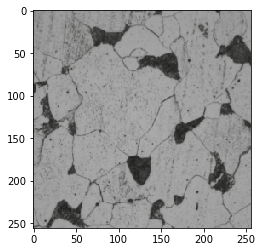

la_img


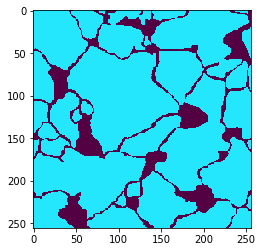

pr_img


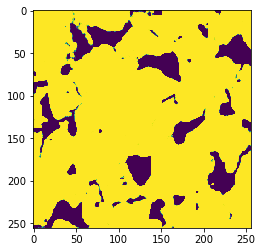

In [1]:
import cv2
import matplotlib.pyplot as plt

in_img = cv2.imread('../tmp/Input_Image_No_1.png')
la_img = cv2.imread('../tmp/Label_Mask_No_1.png')
pr_img = cv2.imread('../tmp/Predicted_Mask_No_1.png', 2)

print('in_img')
plt.imshow(in_img)
plt.show()

print('la_img')
plt.imshow(la_img)
plt.show()

print('pr_img')
plt.imshow(pr_img)
plt.show()